In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cloning detectron repo

In [2]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13629, done.
remote: Counting objects: 100% (1130/1130), done.
remote: Compressing objects: 100% (607/607), done.
remote: Total 13629 (delta 707), reused 865 (delta 514), pack-reused 12499
Receiving objects: 100% (13629/13629), 5.82 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (9663/9663), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 49 kB 2.7 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 145 kB 31.7 MB/s 
     |████████████████████████████████| 130 kB 48.0 MB/s 
     |████████████████████████████████| 843 kB 34.4 MB/s 
     |████████████████████████████████| 749 kB 35.9 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 112 kB 45.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=d6dac6212d18343300744650875e54019e0c4

In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

#To check the pretrained model is working

In [2]:
im = cv2.imread("/content/drive/MyDrive/innoneur/hand_project/kukku2.jpg")

model_final_a6e10b.pkl: 237MB [00:09, 26.1MB/s]                           
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/detectron2_repo/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


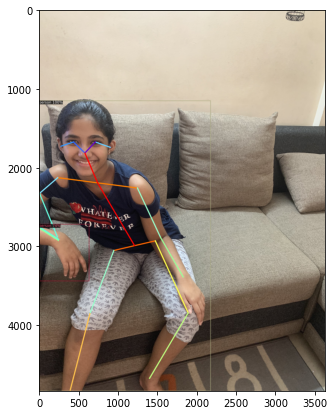

In [3]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
cfg = get_cfg()   # fresh config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(15,7))
plt.imshow(out.get_image()[:, :, ::-1][..., ::-1])

In [4]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

# Register our data (in coco format)

In [5]:
from detectron2.data.datasets import register_coco_instances


register_coco_instances("palm_train", {}, "/content/drive/MyDrive/innoneur/hand_project/COCO_palm_train.json", "/content/drive/MyDrive/innoneur/hand_project/palm_train")

register_coco_instances("palm_valid", {}, "/content/drive/MyDrive/innoneur/hand_project/COCO_palm_valid.json", "/content/drive/MyDrive/innoneur/hand_project/palm_valid")

In [6]:

from detectron2.data import MetadataCatalog

keypoint_names = ['thumb joint4', 'thumb joint3', 'thumb joint2', 'thumb joint1', 'palm joint', 'index joint1','index joint2','index joint3','index joint4','middle joint4','middle joint3','middle joint2','middle joint1',
                  'ring joint1','ring joint2','ring joint3','ring joint4','pinky joint1','pinky joint2','pinky joint3','pinky joint4']
keypoint_flip_map = [('palm joint', 'thumb joint1'), ('thumb joint1', 'thumb joint2'), ('thumb joint2', 'thumb joint3'),('thumb joint3','thumb joint4'),('palm joint','index joint1'),('index joint2','index joint3'),('index joint3','index joint4'),
                     ('palm joint','middle joint1'),('middle joint1','middle joint2'),('middle joint2','middle joint3'),('middle joint3','middle joint4'),
                     ('palm joint','ring joint1'),('ring joint1','ring joint2'),('ring joint2','ring joint3'),('ring joint3','ring joint4'),
                     ('palm joint','pinky joint1'),('pinky joint1','pinky joint2'),('pinky joint2','pinky joint3'),('pinky joint3','pinky joint4')]
keypoint_connection_rules= [('palm joint', 'thumb joint1',(0,0,255)), ('thumb joint1', 'thumb joint2',(255,0,0)), ('thumb joint2', 'thumb joint3',(0,255,0)),('thumb joint3','thumb joint4',(128,0,128)),
                            ('palm joint','index joint1',(0,0,255)),('index joint1','index joint2',(255,0,0)),('index joint2','index joint3',(0,255,0)),('index joint3','index joint4',(128,0,128)),
                            ('palm joint','middle joint1',(0,0,255)),('middle joint1','middle joint2',(255,0,0)),('middle joint2','middle joint3',(0,255,0)),('middle joint3','middle joint4',(128,0,128)),
                            ('palm joint','ring joint1',(0,0,255)),('ring joint1','ring joint2',(255,0,0)),('ring joint2','ring joint3',(0,255,0)),('ring joint3','ring joint4',(128,0,128)),
                            ('palm joint','pinky joint1',(0,0,255)),('pinky joint1','pinky joint2',(255,0,0)),('pinky joint2','pinky joint3',(0,255,0)),('pinky joint3','pinky joint4',(128,0,128))]
from detectron2.data import MetadataCatalog
classes = MetadataCatalog.get("palm_train").thing_classes = ["Hand Pose"]
print(classes)

['Hand Pose']


In [7]:
MetadataCatalog.get("palm_train").thing_classes = ["Hand Pose"]
MetadataCatalog.get("palm_train").thing_dataset_id_to_contiguous_id = {1:0}
MetadataCatalog.get("palm_train").keypoint_names = keypoint_names
MetadataCatalog.get("palm_train").keypoint_flip_map = keypoint_flip_map
MetadataCatalog.get("palm_train").keypoint_connection_rules = keypoint_connection_rules
MetadataCatalog.get("palm_train").evaluator_type="coco"

In [8]:
palm_train_metadata = MetadataCatalog.get("palm_train")

In [9]:
print(palm_train_metadata)

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/innoneur/hand_project/palm_train', json_file='/content/drive/MyDrive/innoneur/hand_project/COCO_palm_train.json', keypoint_connection_rules=[('palm joint', 'thumb joint1', (0, 0, 255)), ('thumb joint1', 'thumb joint2', (255, 0, 0)), ('thumb joint2', 'thumb joint3', (0, 255, 0)), ('thumb joint3', 'thumb joint4', (128, 0, 128)), ('palm joint', 'index joint1', (0, 0, 255)), ('index joint1', 'index joint2', (255, 0, 0)), ('index joint2', 'index joint3', (0, 255, 0)), ('index joint3', 'index joint4', (128, 0, 128)), ('palm joint', 'middle joint1', (0, 0, 255)), ('middle joint1', 'middle joint2', (255, 0, 0)), ('middle joint2', 'middle joint3', (0, 255, 0)), ('middle joint3', 'middle joint4', (128, 0, 128)), ('palm joint', 'ring joint1', (0, 0, 255)), ('ring joint1', 'ring joint2', (255, 0, 0)), ('ring joint2', 'ring joint3', (0, 255, 0)), ('ring joint3', 'ring joint4', (128, 0, 128)), ('palm joint', 'pinky joint1', (0, 0, 25

In [10]:
palm_trains = DatasetCatalog.get("palm_train")
palm_trains

[11/26 09:04:44 d2.data.datasets.coco]: Loaded 14 images in COCO format from /content/drive/MyDrive/innoneur/hand_project/COCO_palm_train.json


[{'annotations': [{'bbox': [93, 49, 72, 139],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': 0,
    'keypoints': [93.94,
     118.9,
     2,
     101.35,
     132.46,
     2,
     110.9,
     152.71,
     2,
     122.28,
     172.87,
     2,
     140.02,
     189.13,
     2,
     123.97,
     122.6,
     2,
     116.89,
     97.15,
     2,
     111.94,
     76.06,
     2,
     108.29,
     62.01,
     2,
     127.24,
     49.7,
     2,
     128.19,
     70.79,
     2,
     129.25,
     87.34,
     2,
     132.2,
     115.52,
     2,
     141.93,
     116.7,
     2,
     142.65,
     88.41,
     2,
     143.47,
     70.63,
     2,
     143.82,
     55.24,
     2,
     152.73,
     125.15,
     2,
     160.17,
     105.2,
     2,
     162.9,
     93.95,
     2,
     165.99,
     81.62,
     2]}],
  'file_name': '/content/drive/MyDrive/innoneur/hand_project/palm_train/palm_6.jpg',
  'height': 256,
  'image_id': 1,
  'width': 256},
 {'annotations': [{'bbox': [

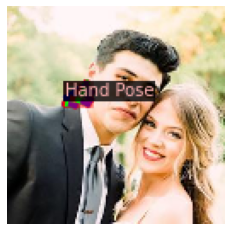

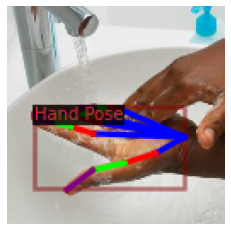

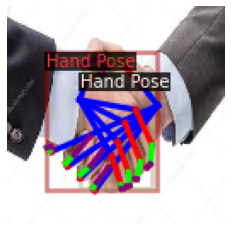

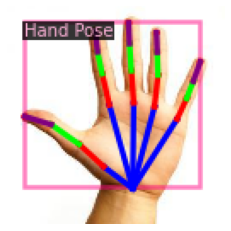

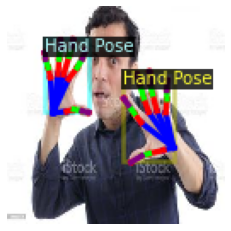

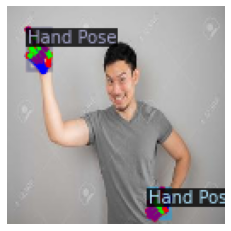

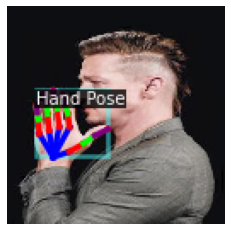

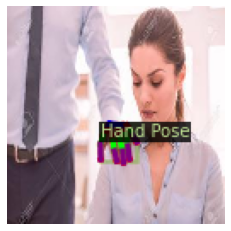

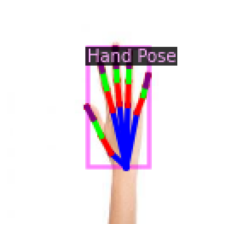

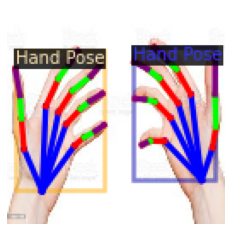

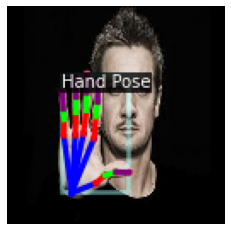

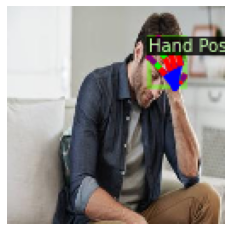

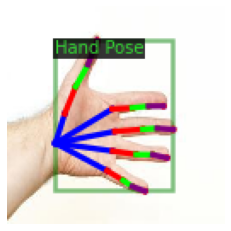

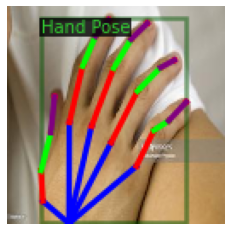

In [11]:
import random
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

palm_metadata = MetadataCatalog.get("palm_train")

def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off');

for d in random.sample(palm_trains, 14):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=palm_metadata, scale=0.5)   
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Training

In [12]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("palm_train",)


#cfg.DATASETS.TEST = ("hand_test",)  #Dataset 'hand_test' is empty in my case
cfg.DATASETS.TEST = ()

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 700   # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.SOLVER.STEPS = [] 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   #128   # faster, and good enough for this toy dataset (default: 512)

#cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
#cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64, 128, 256]]
# cfg.TEST.EVAL_PERIOD = 50 # No. of iterations after which the Validation Set is evaluated. 



cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # hand
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 21
cfg.TEST.KEYPOINT_OKS_SIGMAS = np.ones((21, 1), dtype=float).tolist()

CUDA_LAUNCH_BLOCKING=1
cfg.OUTPUT_DIR = "/content/drive/MyDrive/innoneur/hand_project/model_weights"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)    #CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[11/26 09:06:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.keypoint_head.score_lowres.weight' to the model due to incompatible shapes: (512, 17, 4, 4) in the checkpoint but (512, 21, 4, 4) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.keypoint_head.score_lowres.bias' to the model due to incompatible shapes: (17,) in the checkpoint but (21,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.keypoint_head.score_lowres.{bias, weight}


[11/26 09:06:16 d2.engine.train_loop]: Starting training from iteration 0


/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


[11/26 09:06:39 d2.utils.events]:  eta: 0:13:02  iter: 19  total_loss: 9.013  loss_cls: 0.4353  loss_box_reg: 0.3569  loss_keypoint: 8.111  loss_rpn_cls: 0.03292  loss_rpn_loc: 0.01443  time: 1.1607  data_time: 0.0185  lr: 2.8116e-05  max_mem: 2265M
[11/26 09:07:04 d2.utils.events]:  eta: 0:13:12  iter: 39  total_loss: 8.809  loss_cls: 0.354  loss_box_reg: 0.3559  loss_keypoint: 8.109  loss_rpn_cls: 0.01755  loss_rpn_loc: 0.01185  time: 1.1966  data_time: 0.0089  lr: 5.6659e-05  max_mem: 2265M
[11/26 09:07:29 d2.utils.events]:  eta: 0:12:57  iter: 59  total_loss: 8.671  loss_cls: 0.2204  loss_box_reg: 0.2718  loss_keypoint: 8.078  loss_rpn_cls: 0.01706  loss_rpn_loc: 0.01185  time: 1.2021  data_time: 0.0093  lr: 8.5201e-05  max_mem: 2265M
[11/26 09:07:53 d2.utils.events]:  eta: 0:12:33  iter: 79  total_loss: 8.568  loss_cls: 0.1705  loss_box_reg: 0.2603  loss_keypoint: 8.066  loss_rpn_cls: 0.008122  loss_rpn_loc: 0.009694  time: 1.2059  data_time: 0.0097  lr: 0.00011374  max_mem: 2265M

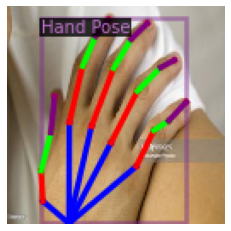

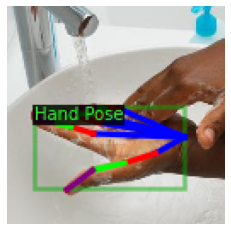

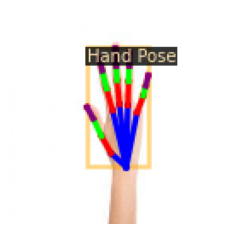

In [13]:
import random

for d in random.sample(palm_trains, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=palm_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

#Validation

In [14]:
from detectron2.engine.hooks import HookBase
from detectron2.evaluation import inference_context
from detectron2.utils.logger import log_every_n_seconds
from detectron2.data import DatasetMapper, build_detection_test_loader
import detectron2.utils.comm as comm
import torch
import time
import datetime
import logging

class LossEvalHook(HookBase):
    def __init__(self, eval_period, model, data_loader):
        self._model = model
        self._period = eval_period
        self._data_loader = data_loader

    def _do_loss_eval(self):
        # Copying inference_on_dataset from evaluator.py
        total = len(self._data_loader)
        num_warmup = min(5, total - 1)

        start_time = time.perf_counter()
        total_compute_time = 0
        losses = []
        for idx, inputs in enumerate(self._data_loader):            
            if idx == num_warmup:
                start_time = time.perf_counter()
                total_compute_time = 0
            start_compute_time = time.perf_counter()
            if torch.cuda.is_available():
                torch.cuda.synchronize()
            total_compute_time += time.perf_counter() - start_compute_time
            iters_after_start = idx + 1 - num_warmup * int(idx >= num_warmup)
            seconds_per_img = total_compute_time / iters_after_start
            if idx >= num_warmup * 2 or seconds_per_img > 5:
                total_seconds_per_img = (time.perf_counter() - start_time) / iters_after_start
                eta = datetime.timedelta(seconds=int(total_seconds_per_img * (total - idx - 1)))
                log_every_n_seconds(
                    logging.INFO,
                    "Loss on Validation  done {}/{}. {:.4f} s / img. ETA={}".format(
                        idx + 1, total, seconds_per_img, str(eta)
                    ),
                    n=5,
                )
            loss_batch = self._get_loss(inputs)
            losses.append(loss_batch)
        mean_loss = np.mean(losses)
        self.trainer.storage.put_scalar('validation_loss', mean_loss)
        comm.synchronize()

        return losses

    def _get_loss(self, data):
        # How loss is calculated on train_loop 
        metrics_dict = self._model(data)
        metrics_dict = {
            k: v.detach().cpu().item() if isinstance(v, torch.Tensor) else float(v)
            for k, v in metrics_dict.items()
        }
        total_losses_reduced = sum(loss for loss in metrics_dict.values())
        return total_losses_reduced


    def after_step(self):
        next_iter = self.trainer.iter + 1
        is_final = next_iter == self.trainer.max_iter
        if is_final or (self._period > 0 and next_iter % self._period == 0):
            self._do_loss_eval()
        self.trainer.storage.put_scalars(timetest=12)

# set up the build_evaluator function so that we can identify how our model
# performs against the validation set while training.
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR,"inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1,LossEvalHook(
            cfg.TEST.EVAL_PERIOD,
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg,True)
            )
        ))
        return hooks
   

In [15]:
# from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("palm_train",)



cfg.DATASETS.TEST = ("palm_valid",)
cfg.TEST.EVAL_PERIOD = 50
#cfg.TEST.PRECISE_BN.NUM_ITER
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 250    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []   


cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   #128   # faster, and good enough for this toy dataset (default: 512)


cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16, 32, 64, 128, 256]]
# cfg.TEST.EVAL_PERIOD = 50 # No. of iterations after which the Validation Set is evaluated. 



cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # hand
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 21
cfg.TEST.KEYPOINT_OKS_SIGMAS = np.ones((21, 1), dtype=float).tolist()


cfg.OUTPUT_DIR = "/content/drive/MyDrive/innoneur/hand_project/weight_valid"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.build_evaluator(cfg, "palm_valid")
trainer.train()


[11/26 09:23:20 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 256, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible shapes: (12, 256, 1, 1) in the checkpoint but (60, 256, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.bias' to the model due to incompatible shapes: (12,) in the checkpoint but (60,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.keypoint_head.score_lowres.weight' to the model due to incompati

WARNING [11/26 09:23:21 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[11/26 09:23:21 d2.engine.train_loop]: Starting training from iteration 0


/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


[11/26 09:23:43 d2.utils.events]:  eta: 0:04:11  iter: 19  total_loss: 9.852  loss_cls: 0.1751  loss_box_reg: 0.08431  loss_keypoint: 8.135  loss_rpn_cls: 0.6938  loss_rpn_loc: 0.6817  time: 1.0974  data_time: 0.0214  lr: 7.6924e-05  max_mem: 2265M
[11/26 09:24:06 d2.utils.events]:  eta: 0:03:50  iter: 39  total_loss: 9.505  loss_cls: 0.213  loss_box_reg: 0.234  loss_keypoint: 8.104  loss_rpn_cls: 0.552  loss_rpn_loc: 0.4925  time: 1.1211  data_time: 0.0091  lr: 0.00015684  max_mem: 2265M
[11/26 09:24:18 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/drive/MyDrive/innoneur/hand_project/COCO_palm_valid.json
[11/26 09:24:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/26 09:24:18 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[11/26 09:24:18 d2.data.common]: Serialized dataset takes 0.00 MiB
WARNING [11/26 

/content/detectron2_repo/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


[11/26 09:24:21 d2.evaluation.evaluator]: Total inference time: 0:00:00.391810 (0.391810 s / iter per device, on 1 devices)
[11/26 09:24:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.335814 s / iter per device, on 1 devices)
[11/26 09:24:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[11/26 09:24:21 d2.evaluation.coco_evaluation]: Saving results to /content/drive/MyDrive/innoneur/hand_project/weight_valid/inference/coco_instances_results.json
[11/26 09:24:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[11/26 09:24:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[11/26 09:24:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[11/26 09:24:21 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[11/26 09:24:21 d2.evaluation.fast_eval_api]: COCOeval_opt.accu

/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


[11/26 09:24:35 d2.utils.events]:  eta: 0:03:33  iter: 59  total_loss: 9.377  loss_cls: 0.1666  loss_box_reg: 0.3156  loss_keypoint: 8.063  loss_rpn_cls: 0.4572  loss_rpn_loc: 0.3891  validation_loss: 9.487  time: 1.1656  data_time: 0.0100  lr: 0.00023676  max_mem: 2265M
[11/26 09:24:59 d2.utils.events]:  eta: 0:03:12  iter: 79  total_loss: 9.071  loss_cls: 0.1516  loss_box_reg: 0.2088  loss_keypoint: 8.023  loss_rpn_cls: 0.3705  loss_rpn_loc: 0.3974  validation_loss: 9.487  time: 1.1705  data_time: 0.0089  lr: 0.00031668  max_mem: 2265M
[11/26 09:25:23 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/drive/MyDrive/innoneur/hand_project/COCO_palm_valid.json
[11/26 09:25:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/26 09:25:23 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[11/26 09:25:23 d2.data.common]:

/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


[11/26 09:25:27 d2.utils.events]:  eta: 0:02:57  iter: 99  total_loss: 8.802  loss_cls: 0.1348  loss_box_reg: 0.2079  loss_keypoint: 7.904  loss_rpn_cls: 0.2948  loss_rpn_loc: 0.3098  validation_loss: 9.315  time: 1.1828  data_time: 0.0092  lr: 0.0003966  max_mem: 2265M
[11/26 09:25:51 d2.utils.events]:  eta: 0:02:35  iter: 119  total_loss: 8.543  loss_cls: 0.1097  loss_box_reg: 0.1549  loss_keypoint: 7.625  loss_rpn_cls: 0.2175  loss_rpn_loc: 0.3495  validation_loss: 9.315  time: 1.1844  data_time: 0.0088  lr: 0.00047652  max_mem: 2265M
[11/26 09:26:16 d2.utils.events]:  eta: 0:02:12  iter: 139  total_loss: 8.174  loss_cls: 0.09035  loss_box_reg: 0.1234  loss_keypoint: 7.377  loss_rpn_cls: 0.2297  loss_rpn_loc: 0.3137  validation_loss: 9.315  time: 1.1934  data_time: 0.0092  lr: 0.00055644  max_mem: 2265M
[11/26 09:26:29 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/drive/MyDrive/innoneur/hand_project/COCO_palm_valid.json
[11/26 09:26:29 d2.data.dataset_mapper]:

/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


[11/26 09:26:45 d2.utils.events]:  eta: 0:01:48  iter: 159  total_loss: 7.573  loss_cls: 0.06991  loss_box_reg: 0.1082  loss_keypoint: 6.92  loss_rpn_cls: 0.1675  loss_rpn_loc: 0.285  validation_loss: 9.143  time: 1.2023  data_time: 0.0093  lr: 0.00063636  max_mem: 2265M
[11/26 09:27:10 d2.utils.events]:  eta: 0:01:24  iter: 179  total_loss: 7.039  loss_cls: 0.07267  loss_box_reg: 0.09114  loss_keypoint: 6.416  loss_rpn_cls: 0.1723  loss_rpn_loc: 0.303  validation_loss: 9.143  time: 1.2080  data_time: 0.0109  lr: 0.00071628  max_mem: 2265M
[11/26 09:27:36 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/drive/MyDrive/innoneur/hand_project/COCO_palm_valid.json
[11/26 09:27:36 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/26 09:27:36 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[11/26 09:27:36 d2.data.common

/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


[11/26 09:27:40 d2.utils.events]:  eta: 0:01:00  iter: 199  total_loss: 6.521  loss_cls: 0.06938  loss_box_reg: 0.09652  loss_keypoint: 5.819  loss_rpn_cls: 0.1407  loss_rpn_loc: 0.308  validation_loss: 9.11  time: 1.2149  data_time: 0.0126  lr: 0.0007962  max_mem: 2265M
[11/26 09:28:05 d2.utils.events]:  eta: 0:00:36  iter: 219  total_loss: 6.114  loss_cls: 0.06065  loss_box_reg: 0.07985  loss_keypoint: 5.542  loss_rpn_cls: 0.1393  loss_rpn_loc: 0.2495  validation_loss: 9.11  time: 1.2186  data_time: 0.0096  lr: 0.00087612  max_mem: 2265M
[11/26 09:28:31 d2.utils.events]:  eta: 0:00:12  iter: 239  total_loss: 5.615  loss_cls: 0.05208  loss_box_reg: 0.08594  loss_keypoint: 5.148  loss_rpn_cls: 0.1128  loss_rpn_loc: 0.2742  validation_loss: 9.11  time: 1.2255  data_time: 0.0096  lr: 0.00095604  max_mem: 2265M


/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/content/detectron2_repo/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


[11/26 09:28:48 d2.utils.events]:  eta: 0:00:00  iter: 249  total_loss: 5.522  loss_cls: 0.05208  loss_box_reg: 0.07774  loss_keypoint: 5.033  loss_rpn_cls: 0.1117  loss_rpn_loc: 0.2587  validation_loss: 9.078  time: 1.2286  data_time: 0.0097  lr: 0.000996  max_mem: 2265M
[11/26 09:28:48 d2.engine.hooks]: Overall training speed: 248 iterations in 0:05:04 (1.2286 s / it)
[11/26 09:28:48 d2.engine.hooks]: Total training time: 0:05:24 (0:00:19 on hooks)
[11/26 09:28:48 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/drive/MyDrive/innoneur/hand_project/COCO_palm_valid.json
[11/26 09:28:48 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/26 09:28:48 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[11/26 09:28:48 d2.data.common]: Serialized dataset takes 0.00 MiB
WARNING [11/26 09:28:48 d2.evaluation.coco_evaluation]

# Testing

/content/detectron2_repo/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


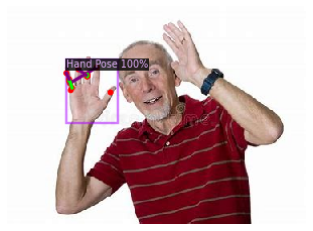

In [22]:




cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # set a custom testing threshold


predictor = DefaultPredictor(cfg)

im = cv2.imread("/content/drive/MyDrive/innoneur/hand_project/hand_39.jfif")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
               metadata=palm_metadata, 
               scale=0.8, 
               #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
               )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])




